In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('npf_train.csv')
# shuffle
# df = df.sample(frac=1).reset_index(drop=True)

class2 = np.array(["event"]*df.shape[0],dtype="object")
class2[df["class4"]=="nonevent"] = "nonevent"
df["class2"] = class2
df["class2"] = df["class2"].astype("category")

not_needed_columns = ["partlybad", "id", "date"]
df = df.drop(not_needed_columns, axis=1)

In [4]:
class2_categories = {
    "nonevent": 0,
    "event": 1
}

class4_categories = {
    "nonevent": 0,
    "Ia": 1,
    "Ib": 2,
    "II": 3
}

def categorize_class2(row):
    row["class2"] = class2_categories[row["class2"]]
    
    return row
def categorize_class4(row):
    row["class4"] = class4_categories[row["class4"]]
    
    return row

df = df.apply(lambda row: categorize_class2(row), axis=1)
df = df.apply(lambda row: categorize_class4(row), axis=1)
df["class2"] = df["class2"].astype("category")
df["class4"] = df["class4"].astype("category")

In [5]:
df["class4"].unique()

[0, 2, 3, 1]
Categories (4, int64): [0, 2, 3, 1]

In [6]:
df.shape

(458, 102)

In [7]:
df.describe()

CO2168.mean  CO2168.std  CO2336.mean  CO2336.std  CO242.mean  \
count   458.000000  458.000000   458.000000  458.000000  458.000000   
mean    380.996307    3.509202   381.014152    3.295570  381.906526   
std      10.897068    3.433711    10.878318    3.192464   10.482752   
min     356.526871    0.053968   356.796486    0.048990  359.795102   
25%     373.001701    1.085523   373.016258    1.016582  374.129292   
50%     380.102616    2.384334   380.101303    2.246497  380.973091   
75%     388.480984    4.956735   388.505367    4.645716  389.003091   
max     411.345970   20.960630   411.360294   19.351218  411.014925   

        CO242.std  CO2504.mean  CO2504.std   Glob.mean    Glob.std  ...  \
count  458.000000   458.000000  458.000000  458.000000  458.000000  ...   
mean     4.290148   380.913345    3.094905  193.287920  145.571635  ...   
std      4.290241    10.900973    2.918037  126.058537   94.362871  ...   
min      0.152663   356.841429    0.037417    3.719434    1.997962  ...   
25%      1.222415   372.921420    1.004862   71.773357   54.867997  ...   
50%      2.714247   380.113959    2.137779  197.939217  156.529795  ...   
75%      6.286882   388.296775    4.376801  304.162015  230.776779  ...   
max     27.656008   411.348676   17.384845  449.450545  309.124047  ...   

        T672.mean    T672.std    T84.mean     T84.std   UV_A.mean    UV_A.std  \
count  458.000000  458.000000  458.000000  458.000000  458.000000  458.000000   
mean     6.311782    1.652786    6.898868    1.987094   10.961236    7.845917   
std      9.680534    0.972092    9.744430    1.172087    6.633754    5.042478   
min    -23.288234    0.066700  -22.659083    0.069879    0.295780    0.174813   
25%     -1.298557    0.833480   -0.661579    0.888506    4.937496    2.890366   
50%      7.320084    1.696258    7.917160    2.027125   11.702413    8.390743   
75%     13.964999    2.359977   14.549644    2.878753   16.727710   12.289556   
max     25.684185    5.124718   25.897075    5.422549   22.560576   16.692785   

        UV_B.mean    UV_B.std     CS.mean      CS.std  
count  458.000000  458.000000  458.000000  458.000000  
mean     0.451261    0.391348    0.003050    0.000659  
std      0.319151    0.289645    0.002257    0.000572  
min      0.005346    0.003261    0.000227    0.000027  
25%      0.137491    0.103036    0.001500    0.000275  
50%      0.438305    0.391399    0.002475    0.000491  
75%      0.700794    0.623115    0.004176    0.000829  
max      1.242857    1.074115    0.019094    0.003658  

[8 rows x 100 columns]

# Correlations

In [8]:
import pandas as pd

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10000):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [9]:
print("Top Correlations of features")
correlations = get_top_abs_correlations(df.drop(["class4", "class2"], axis=1), 10)
print(correlations)

Top Correlations of features
H2O336.mean  H2O504.mean    0.999952
H2O42.mean   H2O84.mean     0.999919
T504.mean    T672.mean      0.999911
H2O504.mean  H2O672.mean    0.999906
H2O168.mean  H2O336.mean    0.999905
T42.mean     T84.mean       0.999900
H2O168.mean  H2O84.mean     0.999895
T168.mean    T84.mean       0.999890
H2O336.mean  H2O672.mean    0.999798
T168.mean    T504.mean      0.999756
dtype: float64


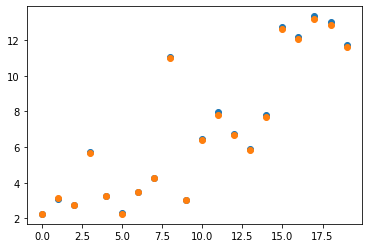

In [10]:
plt.scatter(df.index[0:20], df["H2O336.mean"][0:20])
plt.scatter(df.index[0:20], df["H2O504.mean"][0:20])

In [11]:
cor_matrix = df.drop(["class2", "class4"], axis=1).corr().abs()

In [12]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [13]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9995)]

In [14]:
df_corr_dropped = df.drop(to_drop, axis=1)

In [15]:
df_corr_dropped.head()

class4  CO2168.mean  CO2168.std  CO2336.std  CO242.mean  CO242.std  \
0      0   384.462000    2.284996    2.135062  385.274688   2.211695   
1      0   374.884615    0.415185    0.385179  375.621266   0.665720   
2      0   373.496585    0.189497    0.172958  373.961481   0.235107   
3      0   378.600367    1.934180    1.946536  379.785872   2.865022   
4      2   373.128684    1.096617    1.047750  373.701830   1.259198   

   CO2504.std   Glob.mean    Glob.std  H2O168.mean  ...  T504.std  T672.std  \
0    1.955198   19.245511   11.909549     2.278154  ...  0.436362  0.525698   
1    0.435480   31.107659   24.624718     3.118590  ...  0.428726  0.373927   
2    0.165500   29.800885   22.892316     2.741951  ...  1.071755  0.965988   
3    1.983430   23.795211   16.178905     5.710000  ...  0.112492  0.122651   
4    1.004164  252.480327  138.921953     3.253684  ...  1.748079  1.695622   

    T84.std  UV_A.mean  UV_A.std  UV_B.mean  UV_B.std   CS.mean    CS.std  \
0  0.376324   1.635563  0.856948   0.026438  0.014617  0.003374  0.000733   
1  0.575679   1.441109  0.741088   0.022649  0.012479  0.001501  0.000572   
2  1.238891   2.677545  1.261612   0.044759  0.023748  0.000764  0.000048   
3  0.134191   2.261805  1.345651   0.030893  0.021903  0.002038  0.000751   
4  2.090111  12.906779  7.022300   0.333523  0.239981  0.000662  0.000210   

   class2  
0       0  
1       0  
2       0  
3       0  
4       1  

[5 rows x 91 columns]

In [16]:
df = df.sample(frac=1).reset_index(drop=True)

datasets = []
datasets.append(df)
datasets.append(df_corr_dropped)

datasets[0]

class4  CO2168.mean  CO2168.std  CO2336.mean  CO2336.std  CO242.mean  \
0        3   386.137340    3.103584   386.622222    2.961328  386.762567   
1        2   374.741053    0.258365   374.792807    0.244414  374.967368   
2        3   375.126630    3.168050   374.988172    3.157695  375.636559   
3        3   366.123265   10.444411   365.848367   10.007018  368.433627   
4        0   374.566276    7.020889   374.904069    6.746019  375.137361   
..     ...          ...         ...          ...         ...         ...   
453      0   379.490827   16.135296   378.369474   14.519401  380.986917   
454      0   393.455333    0.302987   393.546800    0.269284  393.167200   
455      3   376.398902    2.291191   376.614909    2.329521  376.437317   
456      0   393.308727    1.006272   393.167091    1.036450  394.196182   
457      0   385.577717    4.274031   385.688804    4.141491  386.128587   

     CO242.std  CO2504.mean  CO2504.std   Glob.mean  ...  T672.std   T84.mean  \
0     3.243981   386.853122    2.772034  380.385155  ...  2.649595   8.041615   
1     0.319377   374.790175    0.232606   35.888710  ...  0.322209  -0.877243   
2     3.136793   374.856882    3.098267  109.917750  ...  1.134215  -2.815619   
3    12.269913   365.522487    9.305810  192.484038  ...  1.956069  13.547258   
4     7.023934   375.173931    6.566881  237.801993  ...  2.261845  13.005184   
..         ...          ...         ...         ...  ...       ...        ...   
453  16.776302   376.810150   12.530131  109.345063  ...  1.375451  11.799687   
454   0.349871   393.569867    0.241787   37.890000  ...  0.279000  -1.439793   
455   2.109036   376.615091    2.188370  366.951684  ...  3.227797  12.514843   
456   1.216382   393.093636    1.013935   32.074926  ...  0.514495  10.353872   
457   4.582591   385.720919    4.006038  319.132788  ...  3.737144  20.776420   

      T84.std  UV_A.mean   UV_A.std  UV_B.mean  UV_B.std   CS.mean    CS.std  \
0    2.965933  21.202718  16.236627   0.941400  0.861020  0.001371  0.000182   
1    0.369158   1.972639   0.802290   0.031221  0.013484  0.000227  0.000067   
2    1.195627   5.823734   3.440747   0.152937  0.105290  0.001223  0.000516   
3    2.416217  11.344823  10.620303   0.417819  0.447621  0.003025  0.000562   
4    2.438967  13.948842  10.148938   0.710639  0.606132  0.002006  0.000527   
..        ...        ...        ...        ...       ...       ...       ...   
453  1.614411   7.025035   6.322459   0.304784  0.312643  0.004706  0.000741   
454  0.292972   2.817411   1.925849   0.081280  0.060592  0.002573  0.000181   
455  3.922316  19.512434  13.151439   0.808117  0.673734  0.004426  0.000582   
456  0.521636   2.529203   1.661457   0.100457  0.079442  0.003557  0.000541   
457  4.055321  18.456267  14.118180   0.844211  0.754675  0.009873  0.001625   

     class2  
0         1  
1         1  
2         1  
3         1  
4         0  
..      ...  
453       0  
454       0  
455       1  
456       0  
457       0  

[458 rows x 102 columns]

# Models

In [163]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = []

model1 = {
    "model": svm.SVC(),
    "params": {
        "kernel":'rbf', 
        "C":10, 
        "random_state":0
    }
}

models.append(model1)

model1 = {
    "model": svm.SVC(),
    "params": {
        "kernel":'rbf', 
        "C":20, 
        "random_state":0
    }
}

models.append(model1)

model1 = {
    "model": svm.SVC(),
    "params": {
        "kernel":'rbf', 
        "C":1, 
        "random_state":0
    }
}

models.append(model1)

model2 = {
    "model": LogisticRegression(),
    "params": {
        "random_state":0,
        "solver": 'lbfgs'
    }
}

models.append(model2)

model3 = {
    "model": DecisionTreeClassifier(),
    "params": {
        "random_state":0
    }
}

models.append(model3)

model4 = {
    "model": RandomForestClassifier(),
    "params": {
        "random_state":0
    }
}
models.append(model4)

model5 = {
    "model": KNeighborsClassifier(),
    "params": {
        "n_neighbors":10
    }
}
models.append(model5)

model6 = {
    "model": GaussianNB(),
    "params": {
    }
}
models.append(model6)

# Feature selection

C:\Users\nicot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nicot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

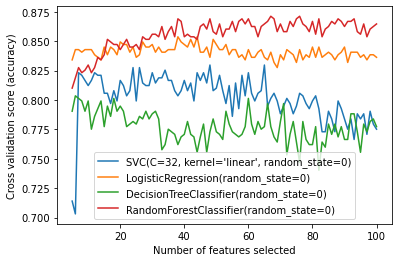

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFECV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.feature_selection import SelectKBest, chi2

min_features_to_select = 5
X = datasets[0].drop(["class4", "class2"], axis=1)
y = datasets[0]["class2"]

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")

for model in models:
    clf = model["model"]
    params = model["params"]
    clf.set_params(**params)

    rfecv = RFECV(estimator=clf, step =1, cv = StratifiedKFold(2), scoring="accuracy", min_features_to_select=min_features_to_select )

    rfecv.fit(X,y)
    # print(f"Optimal number of features for {model} : {rfecv.n_features_}")
    # print(f"Ranking of features: {rfecv.ranking_}")
    # print(rfecv.transform(X).shape)

    # Plot number of features VS. cross-validation scores
    
    plt.plot(
        range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
        rfecv.grid_scores_, label=str(model["model"])
    )

plt.legend()
plt.show()

# Test some models

In [181]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

initial_result = {}
result_df = pd.DataFrame(data=initial_result)

y_col = "class2"

dataset = datasets[0]

X_cols = list(filter(lambda col: col != y_col and col != "class4", dataset.columns))

X_train = dataset[X_cols]
y_train = dataset[y_col]

for model in models:
    clf = model["model"]
    params = model["params"]
    clf.set_params(**params)

    # added pipeline
    pipe = Pipeline([('scaler', StandardScaler()), ("feature_selection", RFECV(estimator=RandomForestClassifier(random_state=0), step =2, cv = StratifiedKFold(10), scoring="accuracy" )), ("clf", clf)]) #RandomForestClassifier(random_state=0)  LinearSVC(penalty="l1", dual=False, random_state=0)

    scores = cross_val_score(pipe, X_train, y_train, cv=10)
    cv_score = scores.mean()

    pipe.fit(X_train, y_train)
    
    new_result_row = { 
        "model": type(clf).__name__, 
        "model_params": params,
        "dataset_columns": list(X_train.columns[pipe.steps[1][1].support_]), 
        "dataset_columns_length": pipe.steps[1][1].transform(X_train).shape[1],
        "cv_acc": cv_score
    }
    result_df = result_df.append(new_result_row, ignore_index=True)

C:\Users\nicot\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\nicot\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\nicot\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\nicot\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\nicot\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

In [182]:
# 10-fold, class2, SVC
result_df.sort_values(by='cv_acc', ascending=False)

cv_acc                                    dataset_columns  \
2  0.861789  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
6  0.856969  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
3  0.854355  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
1  0.854297  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
5  0.852033  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
0  0.849419  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
7  0.774564  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
4  0.771951  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   

   dataset_columns_length                   model  \
2                    80.0                     SVC   
6                    80.0    KNeighborsClassifier   
3                    80.0      LogisticRegression   
1                    80.0                     SVC   
5                    80.0  RandomForestClassifier   
0                    80.0                     SVC   
7                    80.0              GaussianNB   
4                    80.0  DecisionTreeClassifier   

                                    model_params  test_acc  
2   {'kernel': 'rbf', 'C': 1, 'random_state': 0}  0.847826  
6                            {'n_neighbors': 10}  0.869565  
3         {'random_state': 0, 'solver': 'lbfgs'}  0.760870  
1  {'kernel': 'rbf', 'C': 20, 'random_state': 0}  0.782609  
5                            {'random_state': 0}  0.869565  
0  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.804348  
7                                             {}  0.782609  
4                            {'random_state': 0}  0.826087

In [176]:
# 2-fold, class2, SVC
result_df.sort_values(by='test_acc', ascending=False)

cv_acc                                    dataset_columns  \
0  0.866505  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
2  0.827670  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
6  0.827670  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
7  0.774272  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
1  0.861650  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
5  0.859223  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
3  0.851942  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
4  0.810680  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   

   dataset_columns_length                   model  \
0                    28.0                     SVC   
2                    28.0                     SVC   
6                    28.0    KNeighborsClassifier   
7                    28.0              GaussianNB   
1                    28.0                     SVC   
5                    28.0  RandomForestClassifier   
3                    28.0      LogisticRegression   
4                    28.0  DecisionTreeClassifier   

                                    model_params  test_acc  
0  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.869565  
2   {'kernel': 'rbf', 'C': 1, 'random_state': 0}  0.847826  
6                            {'n_neighbors': 10}  0.847826  
7                                             {}  0.847826  
1  {'kernel': 'rbf', 'C': 20, 'random_state': 0}  0.826087  
5                            {'random_state': 0}  0.826087  
3         {'random_state': 0, 'solver': 'lbfgs'}  0.782609  
4                            {'random_state': 0}  0.782609

In [177]:
result_df.sort_values(by='cv_acc', ascending=False)

cv_acc                                    dataset_columns  \
0  0.866505  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
1  0.861650  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
5  0.859223  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
3  0.851942  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
2  0.827670  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
6  0.827670  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
4  0.810680  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   
7  0.774272  [CO2336.std, CO2504.mean, H2O336.mean, H2O336....   

   dataset_columns_length                   model  \
0                    28.0                     SVC   
1                    28.0                     SVC   
5                    28.0  RandomForestClassifier   
3                    28.0      LogisticRegression   
2                    28.0                     SVC   
6                    28.0    KNeighborsClassifier   
4                    28.0  DecisionTreeClassifier   
7                    28.0              GaussianNB   

                                    model_params  test_acc  
0  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.869565  
1  {'kernel': 'rbf', 'C': 20, 'random_state': 0}  0.826087  
5                            {'random_state': 0}  0.826087  
3         {'random_state': 0, 'solver': 'lbfgs'}  0.782609  
2   {'kernel': 'rbf', 'C': 1, 'random_state': 0}  0.847826  
6                            {'n_neighbors': 10}  0.847826  
4                            {'random_state': 0}  0.782609  
7                                             {}  0.847826

In [179]:
# 10-fold features, 2-fold test, class2, SVC
result_df.sort_values(by='test_acc', ascending=False)

cv_acc                                    dataset_columns  \
5  0.854369  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
6  0.822816  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
2  0.837379  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
4  0.808252  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
0  0.861650  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
1  0.856796  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
7  0.759709  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
3  0.842233  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   

   dataset_columns_length                   model  \
5                    80.0  RandomForestClassifier   
6                    80.0    KNeighborsClassifier   
2                    80.0                     SVC   
4                    80.0  DecisionTreeClassifier   
0                    80.0                     SVC   
1                    80.0                     SVC   
7                    80.0              GaussianNB   
3                    80.0      LogisticRegression   

                                    model_params  test_acc  
5                            {'random_state': 0}  0.869565  
6                            {'n_neighbors': 10}  0.869565  
2   {'kernel': 'rbf', 'C': 1, 'random_state': 0}  0.847826  
4                            {'random_state': 0}  0.826087  
0  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.804348  
1  {'kernel': 'rbf', 'C': 20, 'random_state': 0}  0.782609  
7                                             {}  0.782609  
3         {'random_state': 0, 'solver': 'lbfgs'}  0.760870

In [180]:
result_df.sort_values(by='cv_acc', ascending=False)

cv_acc                                    dataset_columns  \
0  0.861650  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
1  0.856796  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
5  0.854369  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
3  0.842233  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
2  0.837379  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
6  0.822816  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
4  0.808252  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   
7  0.759709  [CO2336.std, CO242.mean, CO242.std, CO2504.mea...   

   dataset_columns_length                   model  \
0                    80.0                     SVC   
1                    80.0                     SVC   
5                    80.0  RandomForestClassifier   
3                    80.0      LogisticRegression   
2                    80.0                     SVC   
6                    80.0    KNeighborsClassifier   
4                    80.0  DecisionTreeClassifier   
7                    80.0              GaussianNB   

                                    model_params  test_acc  
0  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.804348  
1  {'kernel': 'rbf', 'C': 20, 'random_state': 0}  0.782609  
5                            {'random_state': 0}  0.869565  
3         {'random_state': 0, 'solver': 'lbfgs'}  0.760870  
2   {'kernel': 'rbf', 'C': 1, 'random_state': 0}  0.847826  
6                            {'n_neighbors': 10}  0.869565  
4                            {'random_state': 0}  0.826087  
7                                             {}  0.782609

In [166]:
# 2-fold, class2, Rforest
result_df.sort_values(by='test_acc', ascending=False)

cv_acc                                    dataset_columns  \
2  0.856796  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
5  0.861650  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
6  0.851942  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
1  0.839806  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
0  0.849515  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
4  0.781553  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
7  0.822816  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
3  0.861650  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   

   dataset_columns_length                   model  \
2                    56.0                     SVC   
5                    56.0  RandomForestClassifier   
6                    56.0    KNeighborsClassifier   
1                    56.0                     SVC   
0                    56.0                     SVC   
4                    56.0  DecisionTreeClassifier   
7                    56.0              GaussianNB   
3                    56.0      LogisticRegression   

                                    model_params  test_acc  
2   {'kernel': 'rbf', 'C': 1, 'random_state': 0}  0.869565  
5                            {'random_state': 0}  0.869565  
6                            {'n_neighbors': 10}  0.869565  
1  {'kernel': 'rbf', 'C': 20, 'random_state': 0}  0.826087  
0  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.804348  
4                            {'random_state': 0}  0.804348  
7                                             {}  0.804348  
3         {'random_state': 0, 'solver': 'lbfgs'}  0.760870

In [167]:
result_df.sort_values(by='cv_acc', ascending=False)

cv_acc                                    dataset_columns  \
3  0.861650  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
5  0.861650  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
2  0.856796  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
6  0.851942  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
0  0.849515  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
1  0.839806  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
7  0.822816  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   
4  0.781553  [CO2168.std, CO2336.mean, CO242.std, CO2504.me...   

   dataset_columns_length                   model  \
3                    56.0      LogisticRegression   
5                    56.0  RandomForestClassifier   
2                    56.0                     SVC   
6                    56.0    KNeighborsClassifier   
0                    56.0                     SVC   
1                    56.0                     SVC   
7                    56.0              GaussianNB   
4                    56.0  DecisionTreeClassifier   

                                    model_params  test_acc  
3         {'random_state': 0, 'solver': 'lbfgs'}  0.760870  
5                            {'random_state': 0}  0.869565  
2   {'kernel': 'rbf', 'C': 1, 'random_state': 0}  0.869565  
6                            {'n_neighbors': 10}  0.869565  
0  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.804348  
1  {'kernel': 'rbf', 'C': 20, 'random_state': 0}  0.826087  
7                                             {}  0.804348  
4                            {'random_state': 0}  0.804348

In [169]:
# 2-fold, class4, Rforest
result_df.sort_values(by='test_acc', ascending=False)

cv_acc                                    dataset_columns  \
4  0.701456  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
6  0.742718  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
1  0.720874  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
5  0.703883  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
0  0.735437  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
2  0.754854  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
3  0.750000  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
7  0.713592  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   

   dataset_columns_length                   model  \
4                    25.0  DecisionTreeClassifier   
6                    25.0    KNeighborsClassifier   
1                    25.0                     SVC   
5                    25.0  RandomForestClassifier   
0                    25.0                     SVC   
2                    25.0                     SVC   
3                    25.0      LogisticRegression   
7                    25.0              GaussianNB   

                                    model_params  test_acc  
4                            {'random_state': 0}  0.826087  
6                            {'n_neighbors': 10}  0.804348  
1  {'kernel': 'rbf', 'C': 20, 'random_state': 0}  0.782609  
5                            {'random_state': 0}  0.782609  
0  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.760870  
2   {'kernel': 'rbf', 'C': 1, 'random_state': 0}  0.673913  
3         {'random_state': 0, 'solver': 'lbfgs'}  0.673913  
7                                             {}  0.673913

In [170]:
result_df.sort_values(by='cv_acc', ascending=False)

cv_acc                                    dataset_columns  \
2  0.754854  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
3  0.750000  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
6  0.742718  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
0  0.735437  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
1  0.720874  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
7  0.713592  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
5  0.703883  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   
4  0.701456  [CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...   

   dataset_columns_length                   model  \
2                    25.0                     SVC   
3                    25.0      LogisticRegression   
6                    25.0    KNeighborsClassifier   
0                    25.0                     SVC   
1                    25.0                     SVC   
7                    25.0              GaussianNB   
5                    25.0  RandomForestClassifier   
4                    25.0  DecisionTreeClassifier   

                                    model_params  test_acc  
2   {'kernel': 'rbf', 'C': 1, 'random_state': 0}  0.673913  
3         {'random_state': 0, 'solver': 'lbfgs'}  0.673913  
6                            {'n_neighbors': 10}  0.804348  
0  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.760870  
1  {'kernel': 'rbf', 'C': 20, 'random_state': 0}  0.782609  
7                                             {}  0.673913  
5                            {'random_state': 0}  0.782609  
4                            {'random_state': 0}  0.826087

In [91]:
# 10-fold, class2, wrong feature information, Rforest
result_df.sort_values(by='test_acc', ascending=False)

cv_acc                                    dataset_columns  \
4  0.846806  [CO2168.mean, CO2168.std, CO2336.std, CO242.me...   
0  0.856852  [CO2168.mean, CO2168.std, CO2336.mean, CO2336....   
3  0.878804  [CO2168.mean, CO2168.std, CO2336.mean, CO2336....   
7  0.827584  [CO2168.mean, CO2168.std, CO2336.std, CO242.me...   
5  0.846690  [CO2168.mean, CO2168.std, CO2336.std, CO242.me...   
1  0.871429  [CO2168.mean, CO2168.std, CO2336.mean, CO2336....   
2  0.803136  [CO2168.mean, CO2168.std, CO2336.mean, CO2336....   
6  0.810221  [CO2168.mean, CO2168.std, CO2336.std, CO242.me...   

   dataset_columns_length                   model  \
4                    89.0                     SVC   
0                   100.0                     SVC   
3                   100.0  RandomForestClassifier   
7                    89.0  RandomForestClassifier   
5                    89.0      LogisticRegression   
1                   100.0      LogisticRegression   
2                   100.0  DecisionTreeClassifier   
6                    89.0  DecisionTreeClassifier   

                                    model_params  test_acc  
4  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.891304  
0  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.869565  
3                            {'random_state': 0}  0.847826  
7                            {'random_state': 0}  0.847826  
5         {'random_state': 0, 'solver': 'lbfgs'}  0.804348  
1         {'random_state': 0, 'solver': 'lbfgs'}  0.782609  
2                            {'random_state': 0}  0.782609  
6                            {'random_state': 0}  0.695652

In [92]:
result_df.sort_values(by='cv_acc', ascending=False)

cv_acc                                    dataset_columns  \
3  0.878804  [CO2168.mean, CO2168.std, CO2336.mean, CO2336....   
1  0.871429  [CO2168.mean, CO2168.std, CO2336.mean, CO2336....   
0  0.856852  [CO2168.mean, CO2168.std, CO2336.mean, CO2336....   
4  0.846806  [CO2168.mean, CO2168.std, CO2336.std, CO242.me...   
5  0.846690  [CO2168.mean, CO2168.std, CO2336.std, CO242.me...   
7  0.827584  [CO2168.mean, CO2168.std, CO2336.std, CO242.me...   
6  0.810221  [CO2168.mean, CO2168.std, CO2336.std, CO242.me...   
2  0.803136  [CO2168.mean, CO2168.std, CO2336.mean, CO2336....   

   dataset_columns_length                   model  \
3                   100.0  RandomForestClassifier   
1                   100.0      LogisticRegression   
0                   100.0                     SVC   
4                    89.0                     SVC   
5                    89.0      LogisticRegression   
7                    89.0  RandomForestClassifier   
6                    89.0  DecisionTreeClassifier   
2                   100.0  DecisionTreeClassifier   

                                    model_params  test_acc  
3                            {'random_state': 0}  0.847826  
1         {'random_state': 0, 'solver': 'lbfgs'}  0.782609  
0  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.869565  
4  {'kernel': 'rbf', 'C': 10, 'random_state': 0}  0.891304  
5         {'random_state': 0, 'solver': 'lbfgs'}  0.804348  
7                            {'random_state': 0}  0.847826  
6                            {'random_state': 0}  0.695652  
2                            {'random_state': 0}  0.782609